In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_data(data, number):
    
    # группируем по блокам и видам, потом считаем кол-во строк: если оно больше 1, то блок в species дуплицирован
    duplicated = data.groupby(['block', 'species']).size() > 1
    
    #
    block_usage = data.groupby(['block']).species.nunique()
    
    # группируем по блокам, считаем, сколько уникальных species к блоку относятся. если равно кол-ву уникальных species,
    # то такой блок присутствует везде
    omnipresent = block_usage == len(data.species.unique())
    
    # количество уникальных блоков
    total = len(data.block.unique())
    
    return duplicated, block_usage, omnipresent, total

In [3]:
def make_row(duplicated, block_usage, omnipresent, total):
    # группируем по блокам, считаем, сколько уникальных species к блоку относятся. если больше 1, то общий
    common = block_usage > 1
    
    # группируем по блокам, считаем, сколько уникальных species к блоку относятся. если равен 1, то блок встречается только
    # у одного species
    unique = block_usage == 1
    
    return unique.sum(), duplicated.sum(), common.sum(), omnipresent.sum(), total

In [4]:
result = pd.DataFrame(columns=['Unique', 'Duplicated', 'Common', 'Omnipresent', 'Total'], index=[1000, 5000])

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


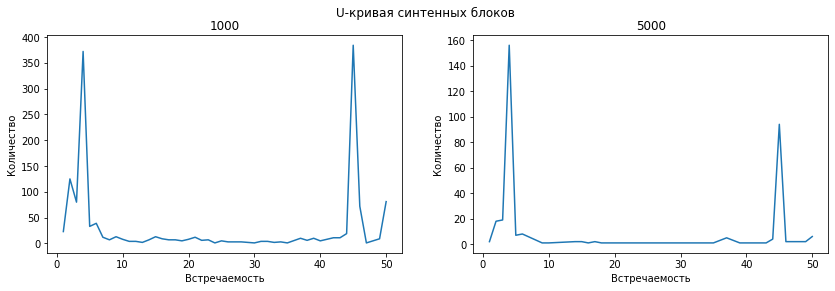

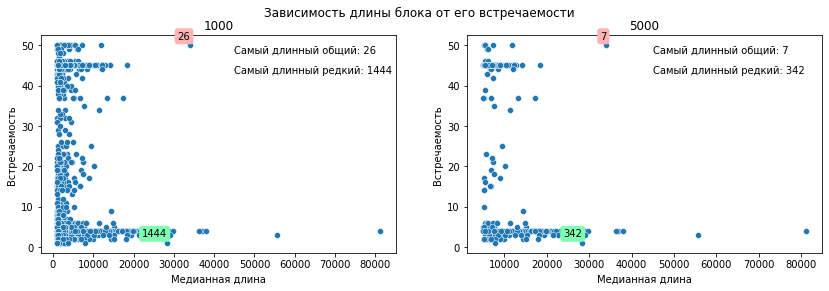

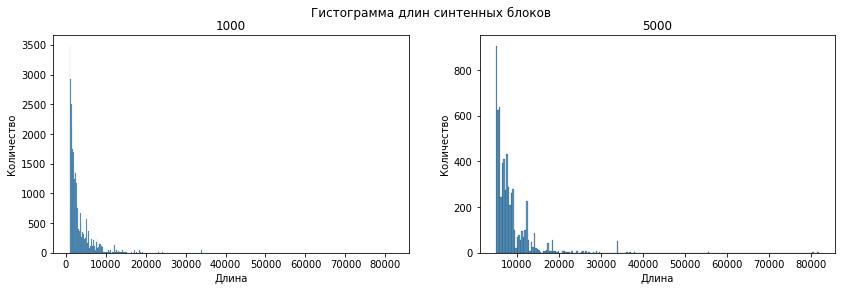

In [5]:
fig_u, axes_u = plt.subplots(1, 2, figsize=(14, 4))
fig_scatter, axes_scatter = plt.subplots(1, 2, figsize=(14, 4))
fig_h, axes_h = plt.subplots(1, 2, figsize=(14, 4))

fig_u.suptitle('U-кривая синтенных блоков')
fig_h.suptitle('Гистограмма длин синтенных блоков')
fig_scatter.suptitle('Зависимость длины блока от его встречаемости')
    
for ax_u, ax_h, ax_scatter, number in zip(axes_u.ravel(), axes_h.ravel(), axes_scatter.ravel(), [1000, 5000]):
    
    # читаем данные
    data = pd.read_csv(f'blocks_coords_{number}.csv')
    
    duplicated, block_usage, omnipresent, total = get_data(data, number)
    row = make_row(duplicated, block_usage, omnipresent, total)
    result.loc[number] = row
    
    u_curve = block_usage.to_frame(name='value').groupby('value').value.size().to_frame(name='cnt').reset_index()
    
    sns.lineplot(ax=ax_u, data=u_curve, x='value', y='cnt')
    ax_u.set_xlabel('Встречаемость')
    ax_u.set_ylabel('Количество')
    ax_u.set_title(number)
    
    data['length'] = abs(data.chr_end - data.chr_beg)
    length = data.groupby('block').length.median()
    usage_dist = pd.DataFrame({'length': length, 'usage': block_usage})
    sns.scatterplot(ax=ax_scatter, data=usage_dist, x='length', y='usage')
    ax_scatter.set_xlabel('Медианная длина')
    ax_scatter.set_ylabel('Встречаемость')
    ax_scatter.set_title(number)
    
    max_length = data.loc[data.block.isin(block_usage.loc[block_usage == block_usage.max()].index)].sort_values('length')
    max_length_block = max_length.block.values[-1]
    x = max_length.length.values[-1]
    y = block_usage.loc[block_usage.index == max_length_block].values[0]
    
    ax_scatter.annotate(max_length_block,
                        xy=(x, y), 
                        xycoords='data',
                        xytext=(x + 1, y + 1), 
                        textcoords='data',
                        horizontalalignment='right',
                        bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                        verticalalignment='bottom')
    
    ax_scatter.text(45000, 50, f'Самый длинный общий: {max_length_block}', va='top')
      
    max_length_single = data.loc[data.block.isin(block_usage.loc[block_usage == 1].index)].sort_values('length')
    max_length_single_block = max_length_single.block.values[-1]
    x = max_length_single.length.values[-1]
    y = block_usage.loc[block_usage.index == max_length_single_block].values[0]
    
    ax_scatter.text(45000, 45, f'Самый длинный редкий: {max_length_single_block}', va='top')
    ax_scatter.annotate(max_length_single_block,
                        xy=(x, y), 
                        xycoords='data',
                        xytext=(x + 1, y + 1), 
                        textcoords='data',
                        horizontalalignment='right',
                        bbox=dict(boxstyle="round", fc=(.5, 1., 0.7), ec="none"),
                        verticalalignment='bottom')
    
    sns.histplot(ax=ax_h, data=data, x='length')
    ax_h.set_xlabel('Длина')
    ax_h.set_ylabel('Количество')
    ax_h.set_title(number)
    
fig_u.show()
fig_h.show()
fig_scatter.show()

In [6]:
result.to_csv('blocks_count.csv')

In [7]:
result

,Unique,Duplicated,Common,Omnipresent,Total
1000,23,170,1441,0,1464
5000,2,9,342,0,344


In [8]:
fig_u.savefig(fig_u._suptitle.get_text(), transparent=False)
fig_h.savefig(fig_h._suptitle.get_text(), transparent=False)
fig_scatter.savefig(fig_scatter._suptitle.get_text(), transparent=False)